# Práctica 1 Extracción del conocimiento en bases de datos

Se desea construir un sistema basado en Analítica de datos que
ayude en la tarea de concesión de los créditos.

## Tareas

1. `Preparar los datos`. 
Desarrollar las tareas de prepararación de los
datos necesarias para disponer de una base de datos apropiada
para la tarea de clasificación. Entre las labores a realizar se encuentran las de visualización y comprensión de las variables, cambio de tipos, transformación e identificación de outliers y datos
faltantes. También debe quedar claro si nos enfrentamos a una
clasificación con clases balanceadas o no.


Para comenzar con la práctica, primero se importan las librerías necesarias y se carga el dataset.

In [122]:
# Carga de las distintas librerías necesarias y el dataset del que se hace uso
import pandas as pd


# Carga del dataset
dataset = pd.read_csv('../data/Base de datos - homeLoanAproval.csv')

Una vez se tienen cargadas las distintas librerías de las cuales se va a hacer uso, y, el dataset, se procede a realizar los cambios de tipos, la transformación e identificación de outliers y datos faltantes.

In [123]:
# Una vez cargado el dataset, se procede a la visualización de los datos del dataset

# Se visualizan los primeros 5 registros del dataset
print(dataset.head())

# Se visualiza la cantidad de registros y columnas del dataset
print()
print('Número de registros y columnas del dataset: ', dataset.shape)

    Loan_ID Gender Married  ... LoanAmountTerm PropertyArea LoanStatus
0  LP001002   Male      No  ...          360.0        Urban          Y
1  LP001003   Male     Yes  ...          360.0        Rural          N
2  LP001005   Male     Yes  ...          360.0        Urban          Y
3  LP001006   Male     Yes  ...          360.0        Urban          Y
4  LP001008   Male      No  ...          360.0        Urban          Y

[5 rows x 12 columns]

Número de registros y columnas del dataset:  (614, 12)


In [124]:
# Se identifican los tipos de datos de las columnas del dataset, además del significado de cada una de ellas
print()
print('Tipos de datos de las columnas del dataset: ')
print(dataset.dtypes)

# Se hace un resumen estadístico de las columnas numéricas del dataset
print()
print('Resumen estadístico de las columnas numéricas del dataset: ')
print(dataset.describe())



Tipos de datos de las columnas del dataset: 
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
SelfEmployed          object
ApplicantIncome        int64
CoapplicantIncome     object
LoanAmount           float64
LoanAmountTerm       float64
PropertyArea          object
LoanStatus            object
dtype: object

Resumen estadístico de las columnas numéricas del dataset: 
       ApplicantIncome  LoanAmount  LoanAmountTerm
count       614.000000  592.000000       600.00000
mean       5403.459283  146.412162       342.00000
std        6109.041673   85.587325        65.12041
min         150.000000    9.000000        12.00000
25%        2877.500000  100.000000       360.00000
50%        3812.500000  128.000000       360.00000
75%        5795.000000  168.000000       360.00000
max       81000.000000  700.000000       480.00000


Teniendo en cuenta esto anterior, cabe destacar que el dataset se compone de 12 variables, de las cuales 11 son variables predictoras y 1 es la variable objetivo. Las variables predictoras son las siguientes:

- `Loan_ID`: Identificador de la solicitud.
- `Gender`: Género del solicitante.
- `Married`: Estado civil del solicitante.
- `Dependents`: Número de personas a cargo del solicitante.
- `Education`: Nivel de educación del solicitante.
- `Self_Employed`: Si el solicitante es autónomo o no.
- `ApplicantIncome`: Ingresos del solicitante.
- `CoapplicantIncome`: Ingresos del segundo solicitante del crédito.
- `LoanAmount`: Cantidad del préstamo.
- `LoanAmountTerm`: Plazo del préstamo (Medido en meses).
- `PropertyArea`: Zona de la propiedad que se quiere hipotecar.
- `LoanStatus`: Indica el estado de que se ha concedido o no el préstamo.

In [125]:
# Se identifican los valores nulos de cada columna del dataset
print()
print('Valores nulos de cada columna del dataset: ')
print(dataset.isnull().sum())


Valores nulos de cada columna del dataset: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
PropertyArea          0
LoanStatus            0
dtype: int64


Teniendo en cuenta los valores nulos que se encuentran en las distintas columnas anteriores, se procede a tomar decisiones o acciones dependiendo del tipo de variable que se trate. 

In [126]:
# Transformación de los datos nulos del dataset

# Imputación de los valores que posteriormente se transfomarán en categóricos a través de la moda
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])
dataset['Married'] = dataset['Married'].fillna(dataset['Married'].mode()[0])
dataset['SelfEmployed'] = dataset['SelfEmployed'].fillna(dataset['SelfEmployed'].mode()[0])

# Imputación de los valores de la variable de Dependents a través de la moda
dataset['Dependents'] = dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])

# Imputación de los valores de la variable de LoanAmount a través de la mediana
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())

# Imputación de los valores de la variable de LoanAmountTerm a través de la moda
dataset['LoanAmountTerm'] = dataset['LoanAmountTerm'].fillna(dataset['LoanAmountTerm'].median())

In [127]:
# Cambios de tipos de datos de las columnas del dataset para su correcto manejo

# Conversión de columnas a tipo categórico, ya que este tipo para pandas es más eficiente que el tipo object, ya que se tratan de aquellas variables que pueden tomar un número limitado de valores distintos 
# Reemplazar valores no válidos en la columna 'Dependents'
dataset['Dependents'] = dataset['Dependents'].replace('3+', 3)

# Conversión de Dependents a tipo entero (int64)
dataset['Dependents'] = dataset['Dependents'].astype('int64')

# Conversión de columnas a tipo categórico
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Married'] = dataset['Married'].astype('category')
dataset['Education'] = dataset['Education'].astype('category')
dataset['SelfEmployed'] = dataset['SelfEmployed'].astype('category')
dataset['PropertyArea'] = dataset['PropertyArea'].astype('category')
dataset['LoanStatus'] = dataset['LoanStatus'].astype('category')

# # Conversión de CoapplicantIncome a tipo numérico (float64)
dataset['CoapplicantIncome'] = dataset['CoapplicantIncome'].str.replace('.', '', regex=False)
dataset['CoapplicantIncome'] = pd.to_numeric(dataset['CoapplicantIncome'], errors='coerce')

# Conversión de LoanAmountTerm a tipo entero
dataset['LoanAmountTerm'] = dataset['LoanAmountTerm'].astype('int64')

Tras estas modificaciones y limpiezas anteriores, se vuelve a mostrar lo anterior para ver los cambios realizados.

In [128]:
print()
print('Valores nulos de cada columna del dataset: ')
print(dataset.isnull().sum())

print()
print('Tipos de datos de las columnas del dataset: ')
print(dataset.dtypes)


Valores nulos de cada columna del dataset: 
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
PropertyArea         0
LoanStatus           0
dtype: int64

Tipos de datos de las columnas del dataset: 
Loan_ID                object
Gender               category
Married              category
Dependents              int64
Education            category
SelfEmployed         category
ApplicantIncome         int64
CoapplicantIncome       int64
LoanAmount            float64
LoanAmountTerm          int64
PropertyArea         category
LoanStatus           category
dtype: object


Con todo este preprocesado de datos anterior, se procede a identificar los outliers que se encuentran en las variables numéricas. Para ello, se puede hacer uso de una nube de puntos, un boxplot o un histograma. En este caso, se va a hacer uso de un boxplot para identificar los outliers.

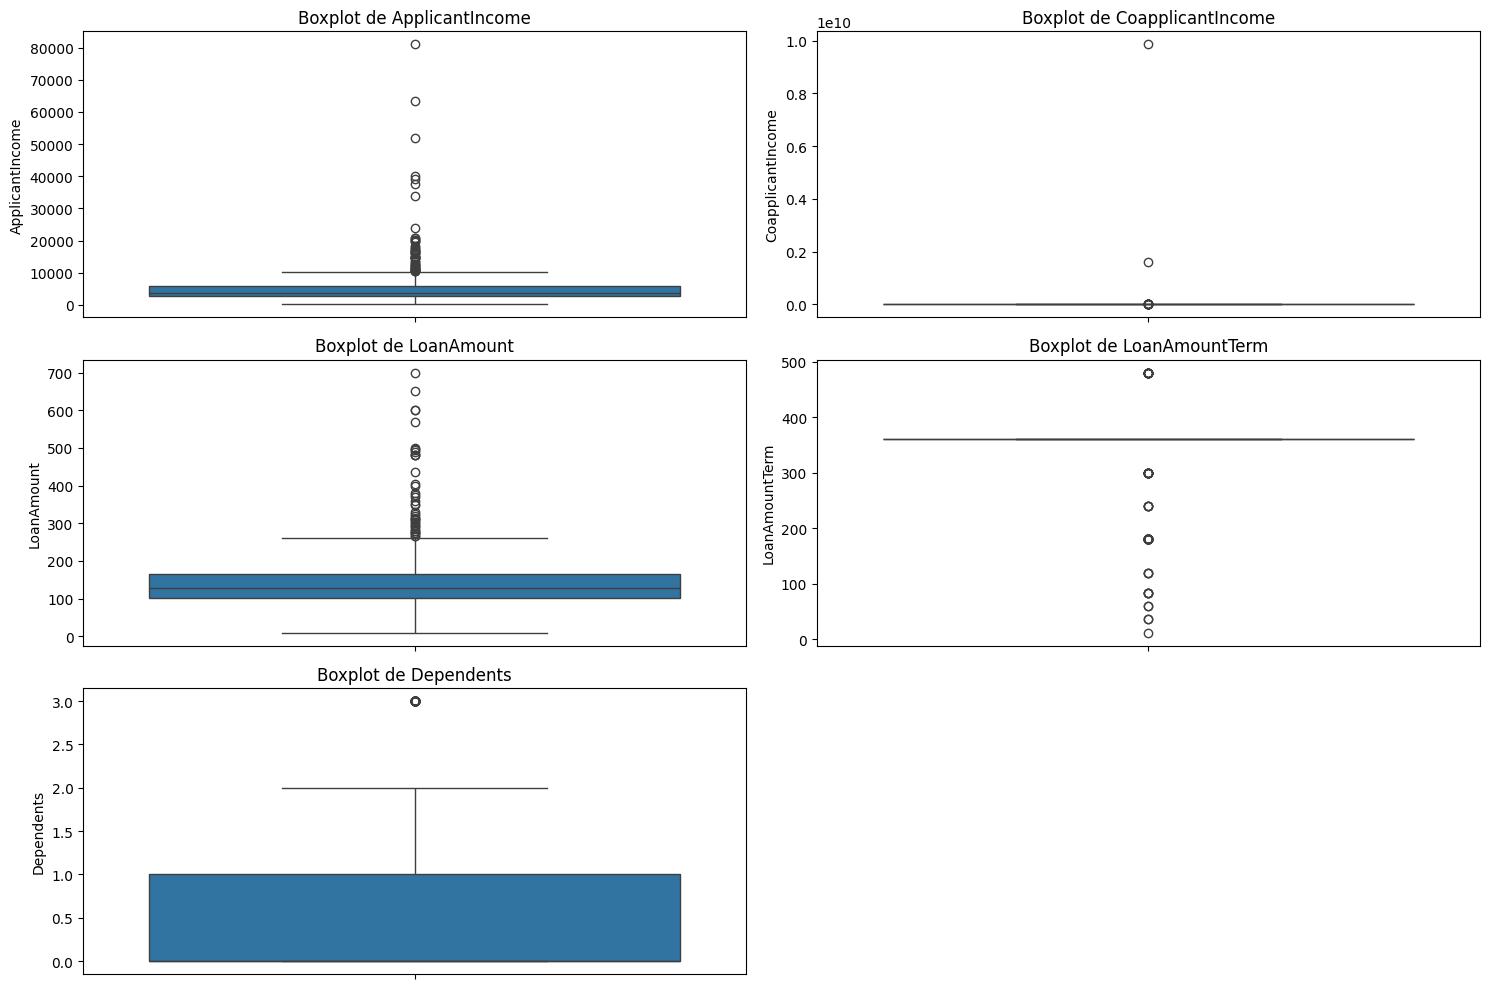

In [129]:
# Identificación de los outliers en las columnas numéricas del dataset
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas del dataset
columnas_numericas = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm', 'Dependents']

# Crear boxplots para cada columna numérica
plt.figure(figsize=(15, 10))

# Ajustar la cuadrícula a 3x2 para acomodar 5 columnas
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=dataset[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()



Una vez se tienen identificados los outliers, para que el clasificador pueda ser lo más preciso posible, se decide tomar aquellas filas del dataset que permitan generar un modelo más preciso. Para ello, se decide eliminar aquellos outliers que se encuentran en las variables numéricas.

In [130]:
import numpy as np

# Se identifican los outliers de la columnas numéricas del dataset

columnas_numericas = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm', 'Dependents']

for column in columnas_numericas:
  # Se calculan los cuartiles 1 y 3
  Q1 = dataset[column].quantile(0.25)
  Q3 = dataset[column].quantile(0.75)

  # Se calcula el rango intercuartílico
  IQR = Q3 - Q1

  # Se calculan los límites inferior y superior
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Se identifican los outliers
  outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]

  # Se realiza el tratamiento de los outliers de la columna
  # Se reemplazan los outliers por el valor de la mediana
  dataset[column] = np.where(dataset[column] > upper_bound, dataset[column].median(), dataset[column])

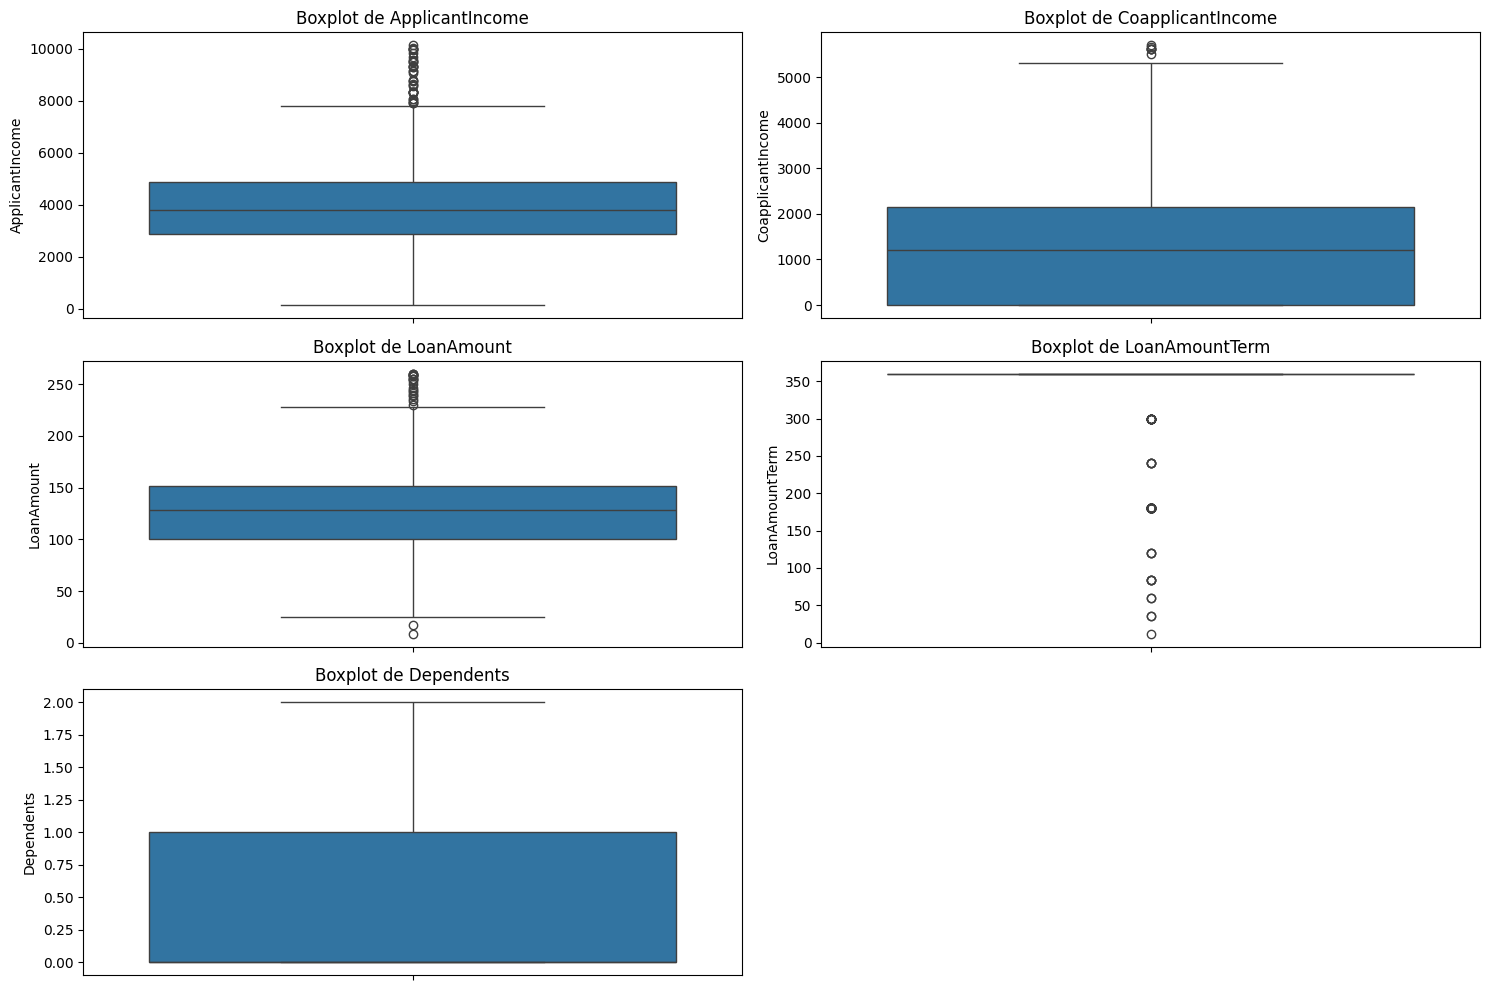

In [131]:
# Comprobación de la eliminación de los outliers
columnas_numericas = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm', 'Dependents']

# Crear boxplots para cada columna numérica
plt.figure(figsize=(15, 10))

# Ajustar la cuadrícula a 3x2 para acomodar 5 columnas
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=dataset[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()

Una vez se tiene todo el dataset limpio y correctamente preprocesado, se puede determinar si nos efrentamos a una clasificación con clases balanceadas o no. Para ello, se muestra el número de elementos que hay en cada clase.

In [132]:
# Clasificación con clases balanceadas

columnas_dataset = dataset.columns

for column in columnas_dataset:
  print(dataset[column].value_counts())


Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
0.0    411
1.0    102
2.0    101
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
SelfEmployed
No     532
Yes     82
Name: count, dtype: int64
ApplicantIncome
3812.5    50
2500.0     9
4583.0     6
6000.0     6
2600.0     6
          ..
3850.0     1
7787.0     1
3430.0     1
3975.0     1
7583.0     1
Name: count, Length: 458, dtype: int64
CoapplicantIncome
0.0       273
1221.0     20
1666.0      5
2500.0      5
2083.0      5
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 269, dtype: int64
LoanAmount
128.0    74
120.0    20
110.0    17
100.0    15
160.0  

Observando el número de elementos que hay en cada clase, se puede ver que no se trata de una clasificación con clases desbalanceadas, ya que el número de elementos que hay en algunas clases es diferente al de otras, por ejempo, en el caso del género de la persona que realiza la solicitud, hay 502 hombres y 112 mujeres. Es por ello que se puede decir que no se trata de una clasificación con clases balanceadas. Ya que existen muchas solicitudes de crédito de hombres y pocas de mujeres.

## Análisis de los datos

b) Analizar los datos. Construir un clasificador k-NN, un árbol de
clasificación y un clasificador naive Bayes. Se propone considerar
varios escenarios. En el primero, independientemente de que existan o no datos faltantes o outliers, se aplicará el correspondiente
algoritmo de inducción sin tener en cuenta estos hechos. En el segundo escenario, se aplicarán técnicas para tratar con los outliers
y los datos faltantes y se construirán los anteriores clasificadores.
Debe evaluarse también el uso de técnicas para tratar con clases desbalanceadas y el efecto que tienen estas técnicas en la calidad de los clasificadores obtenidos


### Clasificador k-NN

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Convertir columnas categóricas a variables dummy (para que sean tratadas como variables numéricas)
X = pd.get_dummies(dataset.drop('LoanStatus', axis=1))
y = dataset['LoanStatus']

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el clasificador k-NN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el clasificador
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

# Evaluar el clasificador
print("Clasificator k-NN scores")
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))

print()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Clasificator k-NN scores
Accuracy score train: 0.7393075356415478
Accuracy score test: 0.5691056910569106

[[ 6 37]
 [16 64]]
              precision    recall  f1-score   support

           N       0.27      0.14      0.18        43
           Y       0.63      0.80      0.71        80

    accuracy                           0.57       123
   macro avg       0.45      0.47      0.45       123
weighted avg       0.51      0.57      0.52       123



### Clasificador Árbol de clasificación

Decision tree scores
Accuracy score train: 0.7026476578411406
Accuracy score test: 0.6504065040650406

[[ 0 43]
 [ 0 80]]
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        43
           Y       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/Users/samuelmartinmorales/Documents/knowledge-extraction-on-databases/P1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/samuelmartinmorales/Documents/knowledge-extraction-on-databases/P1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/samuelmartinmorales/Documents/knowledge-extraction-on-databases/P1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

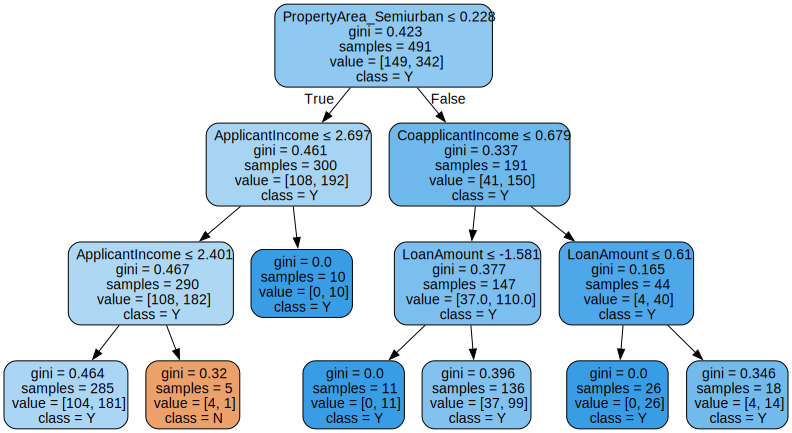

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
import graphviz

# Crear el clasificador de árbol de decisión con hiperparámetros ajustados
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=10, min_samples_leaf=5)

# Entrenar el clasificador
tree_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = tree_clf.predict(X_test)
y_pred_train_tree = tree_clf.predict(X_train)

# Evaluar el clasificador
print("Decision tree scores")
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train_tree)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred_tree)))

print()
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Exportar el árbol de decisión a un archivo DOT
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=tree_clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  

# Visualizar el árbol de decisión
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # Esto guardará el árbol como un archivo PDF llamado "decision_tree.pdf"
graph

### Clasificador Naive Bayes

In [135]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear el clasificador Naive Bayes
nb_clf = GaussianNB()

# Entrenar el clasificador
nb_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_nb = nb_clf.predict(X_test)
y_pred_train_nb = nb_clf.predict(X_train)

# Evaluar el clasificador
print("Naive Bayes scores")
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train_nb)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred_nb)))

print()
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, zero_division=1))

Naive Bayes scores
Accuracy score train: 1.0
Accuracy score test: 0.34959349593495936

[[43  0]
 [80  0]]
              precision    recall  f1-score   support

           N       0.35      1.00      0.52        43
           Y       1.00      0.00      0.00        80

    accuracy                           0.35       123
   macro avg       0.67      0.50      0.26       123
weighted avg       0.77      0.35      0.18       123

